# 2. Probability distributions

## 2.1. Binary Variables (binomial distribution)

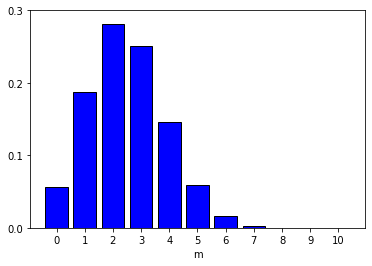

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *
%matplotlib inline

prob = Binomial(10,0.25)

for m in np.arange(0,11,1):
    plt.bar(m,prob.pdf(m),color='b',edgecolor='k')
plt.xlabel("m")
plt.xticks(np.arange(0,11,1))
plt.yticks(np.arange(0,0.4,0.1))
plt.show()


## 2.1.1 The beta distribution

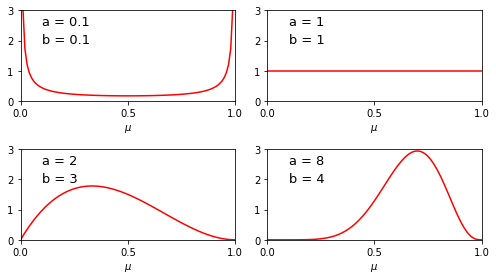

In [2]:
import numpy as np
from pd import *
import matplotlib.pyplot as plt


x = np.linspace(0,1,100)
fig = plt.figure(figsize=(7,4))
for n,[a,b] in enumerate([[0.1,0.1],[1.,1.],[2.,3.],[8.,4.]],1):
    prob = Beta(a,b)
    ax = fig.add_subplot(2,2,n)
    ax.plot(x,prob.pdf(x),color='r')
    plt.xlabel(r"$\mu$")
    plt.xticks([0,0.5,1])
    plt.yticks(np.arange(0,4,1))
    plt.xlim(0,1)
    plt.ylim(0,3)
    plt.annotate("a = {:.1g}".format(a), (0.1, 2.5),size=13)
    plt.annotate("b = {:.1g}".format(b), (0.1, 1.9),size=13)
plt.tight_layout()
plt.show()

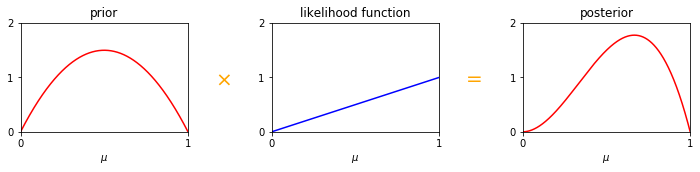

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *

mu=np.linspace(0,1,1000)



fig, ax = plt.subplots(1,3,figsize=(12,2))
model = [Beta(2,2),Binomial(trials=1,prob=mu),Beta(2,2)]
color_list = ['r','b','r']
title_list = ["prior","likelihood function","posterior"]
for i,x in enumerate([mu,1,mu]):
    ax[i].set_title(title_list[i])
    if title_list[i] == "posterior":
        model[i].fit([1])
    ax[i].plot(mu,model[i].pdf(x).ravel(),color=color_list[i])
    ax[i].set_xlabel(r"$\mu$")
    ax[i].set_xlim([0,1])
    ax[i].set_ylim([0,2])
    ax[i].set_xticks([0,1])
    ax[i].set_yticks([0,1,2])

plt.gcf().text(0.35,0.45,r"$\times$",fontsize=20,color='orange')
plt.gcf().text(0.64,0.45,"=",fontsize=20,color='orange')
plt.subplots_adjust(wspace=0.5)
plt.show()

## 2.2.1 The Dirichlet distribution 

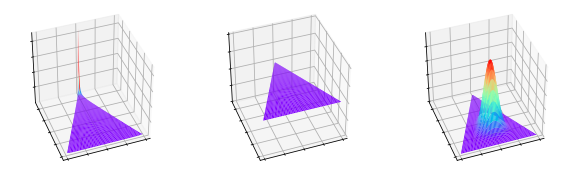

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pd.dirichlet import Dirichlet


'''triangle mesh grid (0,0)-(1,0)-(0,1)'''
X_test = np.array([[0.01*a*0.01*(100-b) for a in range(1, 100)] for b in range(1, 100)])
Y_test = np.array([[0.01*b] * 99 for b in range(1, 100)])
mesh_data = np.array([X_test.ravel(),Y_test.ravel(),1-X_test.ravel()-Y_test.ravel()]).T

X = np.array([x + (0.5 - np.average(x)) for x in X_test])
Y = Y_test * np.sqrt(3) / 2

fig = plt.figure(figsize=(10,3))
for i,alpha in enumerate([0.1,1,10],1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    prob = Dirichlet(np.repeat(alpha,3))
    Z = prob.pdf(mesh_data)
    ax.plot_surface(X,Y, Z.reshape(X.shape),cmap='rainbow')
    ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
    ax.view_init(elev=40, azim=250)
plt.show()


## 2.3. The Gaussian Distribution

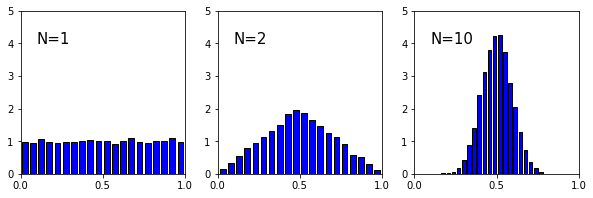

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pd.uniform import Uniform
np.random.seed()

prob = Uniform(low=0, high=1)
plt.figure(figsize=(10, 3))
size = 10000


for i,N in enumerate([1,2,10],1):
    plt.subplot(1, 3, i)
    plt.xlim(0, 1)
    plt.xticks([0,0.5,1])
    plt.ylim(0, 5)
    plt.annotate("N={}".format(N), (0.1, 4.),fontsize=15)
    sample = np.zeros(size)
    for _ in range(N):
        sample += prob.draw(size)
    plt.hist(sample/N, bins=20,color='b',density=True,rwidth = 0.7,edgecolor='black',lw=1.)
plt.show()

## 2.3.6 Bayesian inference for the Gaussian

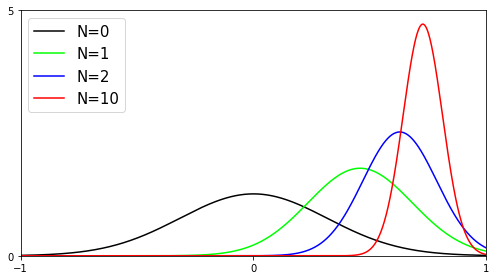

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *


model = Gauss(mu=0.,var=0.1)
x = np.linspace(-1,1,1000)

fig = plt.figure(figsize=(7,4))
ax=fig.add_subplot(111)

ax.plot(x,model.pdf(x),color='k',label="N=0")
color_list=['lime','blue','red']
for i,n_sample in enumerate([1,2,10]):
    model.mu_fit(np.random.normal(loc=0.8,scale=0.1,size=n_sample))
    ax.plot(x,model.pdf(x),color=color_list[i],label="N={0}".format(n_sample))

plt.xlim(-1,1)
plt.ylim(0,5)
plt.xticks([-1,0,1])
plt.yticks([0,5])
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

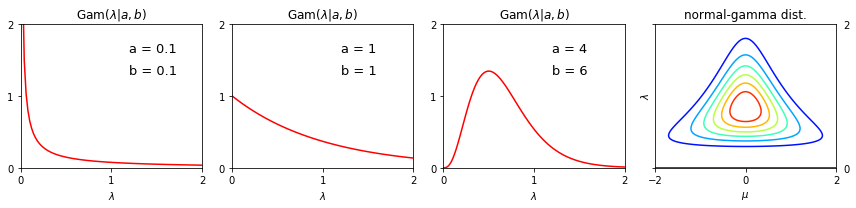

In [7]:
import numpy as np
from pd import *
import matplotlib.pyplot as plt

Font_size = 12
x = np.linspace(0,2,100)
fig = plt.figure(figsize=(12,3.))
# plot gamma distribution
for n,[a,b] in enumerate([[0.1,0.1],[1.,1.],[4.,6.]],1):
    prob = Gamma(a,b)
    ax = fig.add_subplot(1,4,n)
    ax.plot(x,prob.pdf(x),color='r')
    plt.title("Gam"+r"$(\lambda|a,b)$",fontsize=Font_size)
    plt.xlabel(r"$\lambda$")
    plt.xticks([0,0.5,1])
    plt.yticks(np.arange(0,4,1))
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.xticks(np.arange(0,3,1))
    plt.annotate("a = {:.1g}".format(a), (1.2, 1.6),size=13)
    plt.annotate("b = {:.1g}".format(b), (1.2, 1.3),size=13)


# plot nomal-gamma distribution
ax = fig.add_subplot(144)
mu,lamda = np.meshgrid(np.linspace(-2,2,100),np.linspace(0,2,100))
prob = Gamma(5,6)
Z = prob.norm_gamma(mu=mu.ravel(),x=lamda.ravel())
ax.contour(mu,lamda,Z.reshape(mu.shape),levels=np.linspace(min(Z),max(Z),8),cmap='jet')
ax.tick_params(labelleft=False,labelright=True)
plt.xticks([-2,0,2])
plt.yticks([0,2])
plt.xlim(-2,2)
plt.ylim(0,2)
plt.title("normal-gamma dist.",fontsize=Font_size)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\lambda$")
plt.subplots_adjust()
plt.tight_layout()
plt.show()

## 2.3.7 Student’s t-distribution

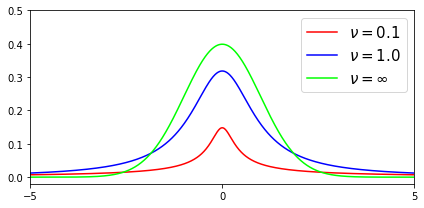

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *

prob = Students_t(mu=0.,tau=1.)

x = np.linspace(-5,5,1000)

fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
color_list = ['red','blue','lime']

for i,nu in enumerate([0.1,1.,np.inf]):
    prob.set_df(nu)
    if nu < np.inf:
        ax.plot(x,prob.pdf(x),color=color_list[i],label=r'$\nu={0}$'.format(nu))
    else:
        ax.plot(x,prob.pdf(x),color=color_list[i],label=r'$\nu=\infty$')

plt.xlim(-5,5)
plt.xticks([-5,0,5])
plt.yticks(np.arange(0,0.6,0.1))
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()